# Task 2: To Explore Supervise Machine Learning

###### 1) Import libraries

In [47]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

###### 2) Read the CSV file

In [69]:
data = pd.read_csv("student_scores - student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [142]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###### 3) Visualize the data 

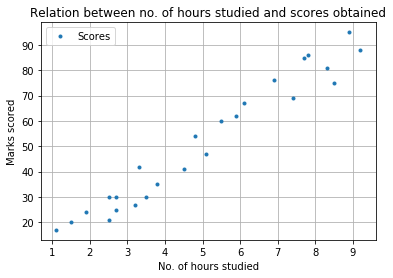

In [182]:
# plot the score distribution
data.plot(x="Hours",y = "Scores",style = ".")
plt.xlabel('No. of hours studied')
plt.ylabel('Marks scored')
plt.title('Relation between no. of hours studied and scores obtained')
plt.grid()
plt.show()

The above plot shows that the relationship between marks scored and no. of hours studied is almost linear, i.e. more no. of hours studied, higher is the score

###### 4) Divide into X and Y


In [202]:
X = data.iloc[:,:-1].values  # 2d array
Y = data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [199]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

###### 5) Split into Training and testing data  

In [198]:
# split into train and test data (70-30 ratio)
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.3, random_state=0) 

###### 6) Train the model 

In [197]:
# training the Data
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,Y_train)

print("Training completed")

Training completed


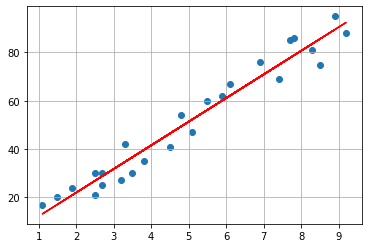

In [196]:
# plot the trained model

line = lr.coef_*X+lr.intercept_    #y=mx+c

plt.scatter(X, Y)
plt.plot(X, line,color = 'red')
plt.grid()
plt.show()

In [186]:
print("m = ",lr.coef_,"\nc = ",lr.intercept_)  # slope(m) and intercept(c) for the ploted line

m =  [9.78856669] 
c =  2.370815382341881


###### 7)  Use Test data(X_test) to test the model

In [187]:
Y_pred=lr.predict(X_test)

###### 8) Compare with the Actual test Data outputs (Y_test)

In [188]:
#Comparing the Actual and predicted Y

compare = pd.DataFrame ({"Actual":Y_test,"Predicted":Y_pred})
compare

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


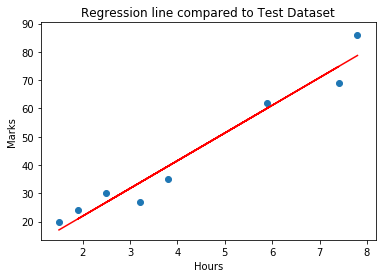

In [189]:
#plot the line on test data

plt.plot(X_test,Y_pred,color="red")
plt.scatter(X_test, Y_test,marker = "o")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt. title("Regression line compared to Test Dataset")
plt.show()

###### 9) Can be used for new data points as well 

In [190]:
# testing with new data

hours = [[9.5],[5.0]]
Score = lr.predict(hours)
Score

array([95.36219891, 51.31364882])

###### 10) Performance measures 

In [191]:
# Performance Measure of the model

from sklearn import metrics
 
# Calculate MAE, MSE and RMSE

print("Mean Absolute Error : ",(metrics.mean_absolute_error(Y_test, Y_pred)))
print("Mean Squared Error : ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error :  4.419727808027652
Mean Squared Error :  22.96509721270043
Root Mean Squared Error :  4.792191274636315


In [192]:
print("R2 Score :",metrics.r2_score(Y_test, Y_pred))

R2 Score : 0.9568211104435257


Above measurements show that out model is a good model